In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

Cifar10 is a dataset of 10 classess(dog,bird, cat, etc) of colourful(R,G,B colour channel images with 32,32 resolution 

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
cifar10.load_data()

170498071/170498071 [==============================] - 17s 0us/step


((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [4]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
x_test.shape

(10000, 32, 32, 3)

In [9]:
y_test.shape

(10000, 1)

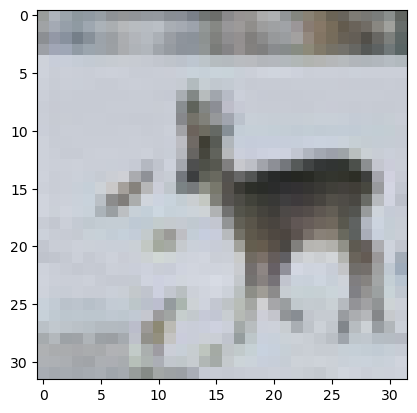

In [11]:
plt.imshow(x_train[20])

In [12]:
y_train[0]

array([6], dtype=uint8)

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_cat_train=to_categorical(y_train)

In [15]:
y_cat_test=to_categorical(y_test)

In [18]:
x_train=x_train/255

In [19]:
x_test=x_test/255

In [20]:
from tensorflow.keras.models import Sequential

In [21]:
from tensorflow.keras.layers import Dense, Conv2D,MaxPool2D,Flatten

In [22]:
28*28

784

In [23]:
32*32*3

3072

So,More convolutional + pooling layer is added because it is colour image. Number of neurons in Dense layer is also increased.

In [24]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [28]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=early_stop)

Epoch 1/15
1563/1563 [==============================] - 45s 28ms/step - loss: 1.5091 - accuracy: 0.4539 - val_loss: 1.2619 - val_accuracy: 0.5457
Epoch 2/15
1563/1563 [==============================] - 42s 27ms/step - loss: 1.1594 - accuracy: 0.5883 - val_loss: 1.0723 - val_accuracy: 0.6276
Epoch 3/15
1563/1563 [==============================] - 38s 24ms/step - loss: 1.0119 - accuracy: 0.6473 - val_loss: 1.0744 - val_accuracy: 0.6234
Epoch 4/15
1563/1563 [==============================] - 38s 24ms/step - loss: 0.9088 - accuracy: 0.6831 - val_loss: 1.0077 - val_accuracy: 0.6525
Epoch 5/15
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8256 - accuracy: 0.7114 - val_loss: 0.9544 - val_accuracy: 0.6714
Epoch 6/15
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7511 - accuracy: 0.7377 - val_loss: 0.9581 - val_accuracy: 0.6762
Epoch 7/15
1563/1563 [==============================] - 33s 21ms/step - loss: 0.6862 - accuracy: 0.7600 - val_loss: 0.9582 -

In [29]:
metrics=pd.DataFrame(model.history.history)

In [30]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.509104,0.45394,1.261872,0.5457
1,1.159362,0.58830,1.072317,0.6276
2,1.011858,0.64726,1.074446,0.6234
3,0.908789,0.68310,1.007694,0.6525
4,0.825561,0.71142,0.954432,0.6714
5,0.751073,0.73772,0.958101,0.6762
6,0.686191,0.76000,0.958211,0.6850


<AxesSubplot: >

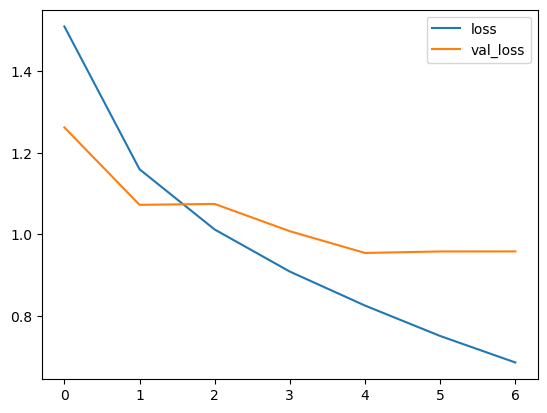

In [31]:
metrics[['loss','val_loss']].plot()

<AxesSubplot: >

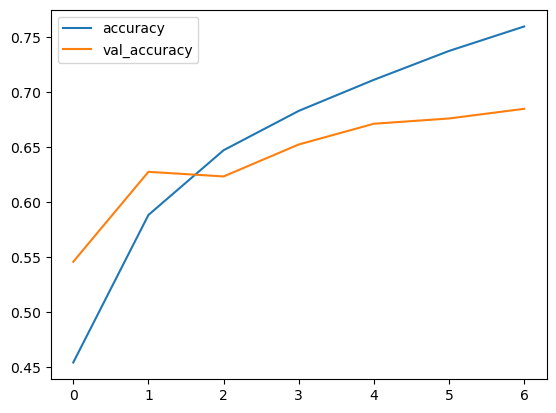

In [32]:
metrics[['accuracy','val_accuracy']].plot()

In [33]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9582 - accuracy: 0.6850


[0.9582114219665527, 0.6850000023841858]

In [40]:
predictions=model.predict(x_test)
predictions=predictions.argmax(axis=1)

313/313 [==============================] - 1s 4ms/step


In [41]:
predictions

array([3, 8, 1, ..., 5, 4, 7], dtype=int64)

In [42]:
predictions[0]

3

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71      1000
           1       0.87      0.73      0.80      1000
           2       0.62      0.58      0.60      1000
           3       0.46      0.55      0.50      1000
           4       0.59      0.68      0.63      1000
           5       0.58      0.61      0.60      1000
           6       0.76      0.78      0.77      1000
           7       0.78      0.66      0.72      1000
           8       0.79      0.79      0.79      1000
           9       0.78      0.77      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.68      0.69     10000
weighted avg       0.70      0.69      0.69     10000



class 3 is performing least, it has the least value for precision and f1 score. class 3 is cat images. class 1 (automobile images) has the best performance.

In [45]:
print(confusion_matrix(y_test,predictions))

[[693  15  71  34  44  11  14   7  82  29]
 [ 32 735  10  29  10   5  25   4  40 110]
 [ 44   6 577  93 102  70  59  27  11  11]
 [ 20   4  69 553  82 173  54  23   8  14]
 [ 10   0  53  95 683  47  45  52  12   3]
 [  8   2  56 206  58 613  21  27   3   6]
 [  7   6  51  72  39  23 780  13   7   2]
 [ 15   1  25  60 117  96   9 664   5   8]
 [ 70  21   9  37  21   9   4   8 787  34]
 [ 46  56  14  31  10  11  10  22  35 765]]


<AxesSubplot: >

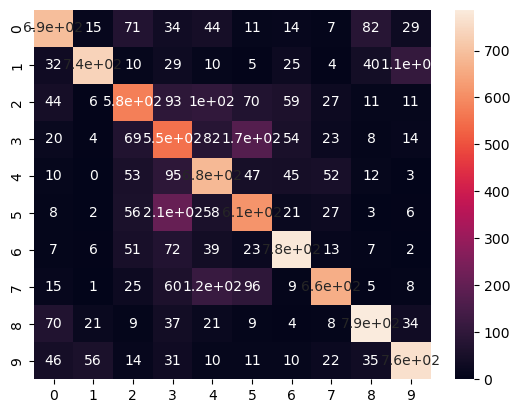

In [47]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

it has purple colur annotation between 3 and 5 ie. dog and cat images.

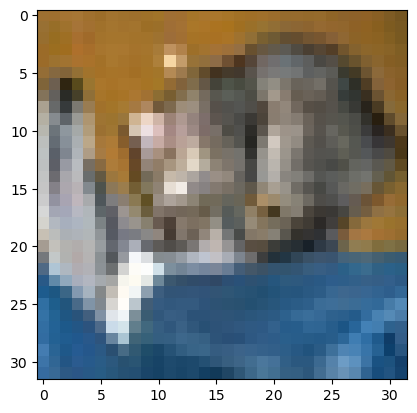

In [49]:
plt.imshow(x_test[0])

In [50]:
x_test[0].shape

(32, 32, 3)

In [51]:
y_test[0]

array([3], dtype=uint8)

In [52]:
predict_1=model.predict(x_test[0].reshape(1,32,32,3))

1/1 [==============================] - 0s 28ms/step


In [53]:
predict_1

array([[0.0092294 , 0.00226666, 0.0950785 , 0.7052887 , 0.02086161,
        0.05708924, 0.10265951, 0.00141005, 0.00435815, 0.0017581 ]],
      dtype=float32)

In [54]:
predict_1=predict_1.argmax(axis=1)

In [55]:
predict_1

array([3], dtype=int64)